Namespace(case='cylinder',

          data_dir='../data/cylinder', 
          dump_dir='data/cylinder/ours', 
          space_dim=2,
          mode=0, 
          n_train=1000, 
          n_valid=100, 
          n_test=100, 
          time_len=600, 
          noise_level=(0.02, 0.02), 
          noise_gamma=1, 
          recal_mesh=False, 
          consist_mesh=False, 
          multi_mesh_layer=7, 
          mp_time=1, 
          hidden_dim=128, 
          hidden_depth=2, 
          num_epochs=5, 
          batch=32, 
          lr=0.0001, 
          gamma=0.79432823472, 
          restart_epoch=-1, 
          MP_time=1, 
          device=device(type='cpu'))

## DATASET

In [8]:
from dataprocessing.dataset import MeshDataset

In [9]:

data_dir = 'data/cylinder_flow/'

In [10]:
mmdata = MeshDataset(root_dir = data_dir, 
                     instance_id = 1,
                     layer_num=5)


In [11]:
for i in range(len(mmdata.m_ids)):
  print(f'm_ids : {len(mmdata.m_ids[i])}')

# m_gs holds which edges to keep after downpooling
for i in range(len(mmdata.m_gs)):
  print(f'm_gs : {mmdata.m_gs[i].shape}')

m_ids : 950
m_ids : 476
m_ids : 241
m_ids : 121
m_ids : 67
m_gs : torch.Size([2, 10788])
m_gs : (2, 8194)
m_gs : (2, 6044)
m_gs : (2, 5080)
m_gs : (2, 4484)
m_gs : (2, 3232)


In [19]:
from utils.visualization import plot_mesh, draw_graph
import torch
from torch_geometric.data import Data

threshold 0.0037333333333333333


/opt/homebrew/Caskroom/miniforge/base/envs/master/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


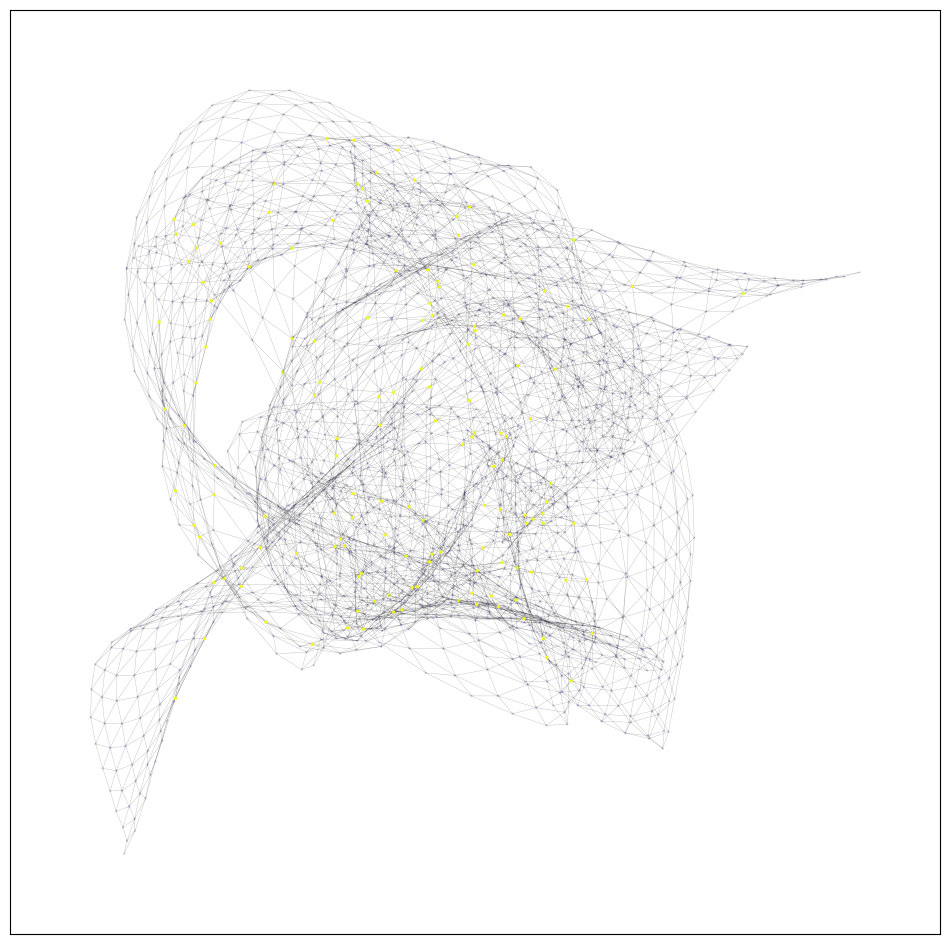

In [20]:
graph = mmdata.get(2)
draw_graph(graph)

threshold 0.17083333333333334


/opt/homebrew/Caskroom/miniforge/base/envs/master/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


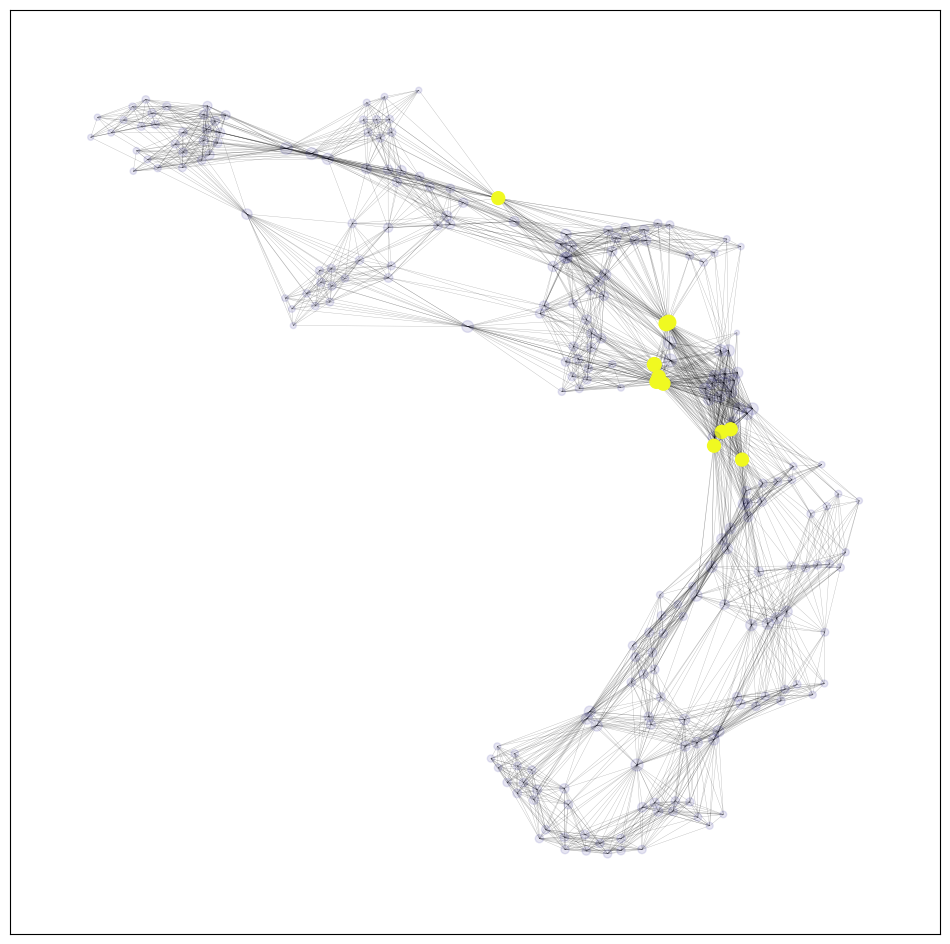

In [21]:
l = 2
graph_load = Data(x = graph.x[mmdata.m_ids[l]], edge_index=torch.tensor(mmdata.m_gs[l+1]), mesh_pos = graph.mesh_pos[mmdata.m_ids[l]], cells = graph.cells[mmdata.m_ids[l]])
draw_graph(graph_load)

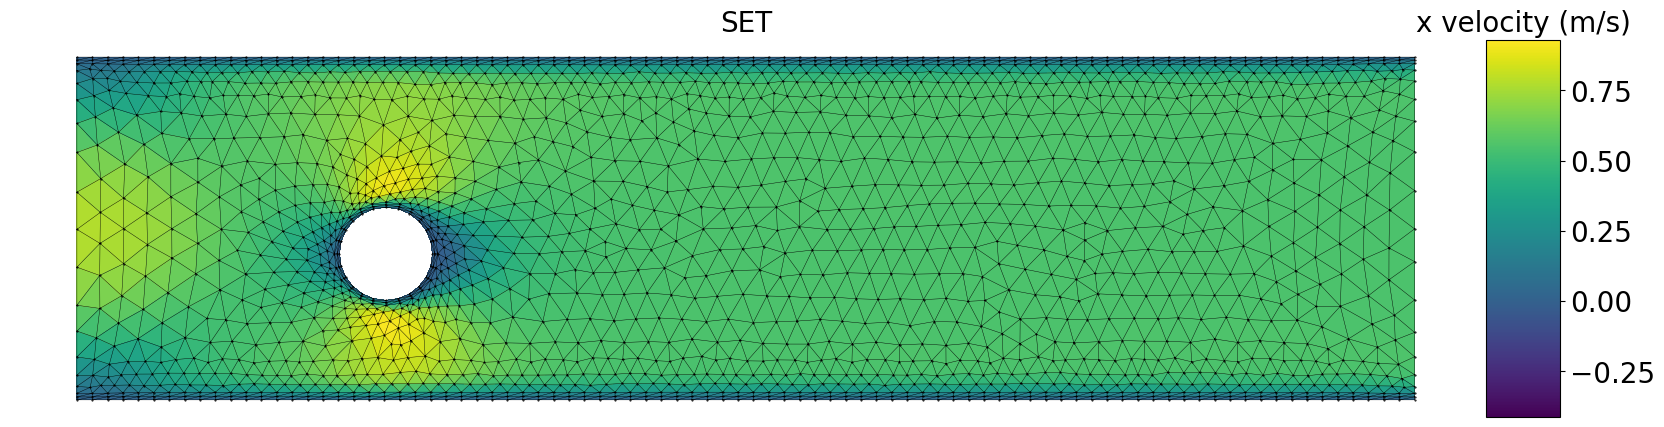

In [28]:
plot_mesh(mmdata.get(11))

In [16]:
class objectview(object):
    def __init__(self, d):
        self.__dict__ = d

for args in [
        {'save_dir' : 'graphs',
         'num_nodes' : 0
        }
    ]:
        args = objectview(args)

Data(x=[45, 11], edge_index=[2, 1980], mesh_pos=[45, 2], cells=[45, 3])
threshold 1.0


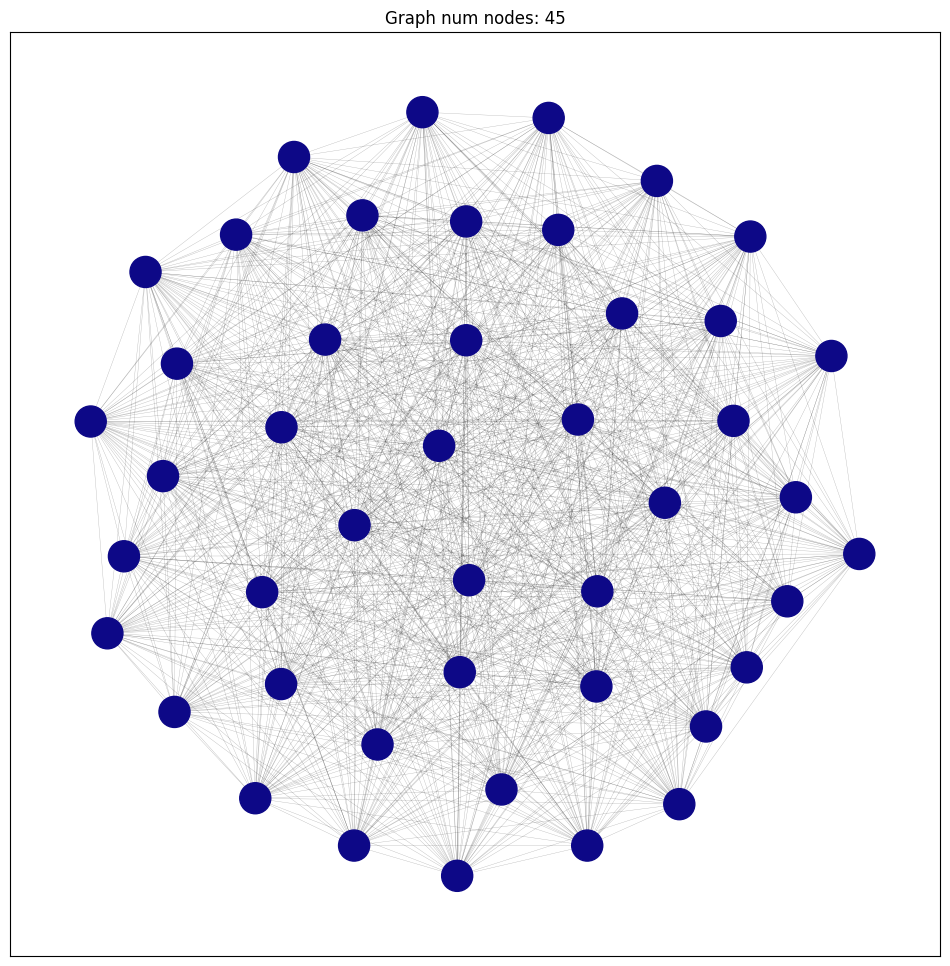